In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from numpy import asarray
import glob
import cv2
import tensorflow as tf
from tensorflow import keras

## Import Data

#### Labels for images   ____ train.csv

In [2]:
all_labels=pd.read_csv('train.csv')

In [3]:
Labels_DF=pd.DataFrame(all_labels)
Labels_DF.rename(columns={'image':'file_name'}, inplace=True)
Labels_DF.head(3)

,file_name,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b


In [ ]:
#Labels_DF['species'].value_counts()

In [4]:
## species with incorrect spellings.  bottlenose_dolpin, kiler_whale.
Labels_DF['species'].replace('bottlenose_dolpin', 'bottlenose_dolphin', inplace=True)
Labels_DF['species'].replace('kiler_whale', 'killer_whale', inplace=True)

In [5]:
## create subcategory for whale or dolphin
sub=[]
for each in Labels_DF['species']:
    if 'dolphin' in each:
        a=0
    else: a=1
    sub.append(a)

In [6]:
Labels_DF['category']=sub

In [7]:
## create species cat numerical 
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
SE=OE.fit_transform(Labels_DF[['species']])
Labels_DF['species_category']=SE.astype(int)

In [8]:
Labels_DF.head(6)

,file_name,species,individual_id,category,species_category
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,1,16
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,1,13
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,1,8
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,0,2
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,1,13
5,000a8f2d5c316a.jpg,bottlenose_dolphin,b9907151f66e,0,2


In [41]:
len(Labels_DF['species'].value_counts())
len(Labels_DF)

51033

In [ ]:
#Labels_DF['species'].value_counts()

#### Images

In [9]:
## Create image extraction and augment function
from PIL import ImageOps
import cv2


def retrieve_augment(path, size=(200,150)):
    image_list = []
    for filename in glob.glob(path):
        im=Image.open(filename)
        reshaped=ImageOps.fit(im, size, Image.ANTIALIAS)
        reshaped_gray=reshaped.convert(mode='L')
        array=asarray(reshaped_gray)
        norm=array/255
        image_list.append(norm)
        im.close()
    return image_list

In [10]:
image_list=retrieve_augment(path='../../Kaggle_Marine_Life/train_images/*.jpg')

In [11]:
image_list[7]

array([[0.74117647, 0.74117647, 0.74117647, ..., 0.74117647, 0.7372549 ,
        0.7372549 ],
       [0.74509804, 0.74509804, 0.74509804, ..., 0.74117647, 0.74117647,
        0.74117647],
       [0.74901961, 0.74901961, 0.74901961, ..., 0.74117647, 0.74509804,
        0.74117647],
       ...,
       [0.51764706, 0.50588235, 0.52941176, ..., 0.21568627, 0.21176471,
        0.21176471],
       [0.63921569, 0.61568627, 0.61176471, ..., 0.21568627, 0.20784314,
        0.21960784],
       [0.66666667, 0.6627451 , 0.62352941, ..., 0.22745098, 0.22745098,
        0.23137255]])

#### Turn image list into array

In [12]:
X_array=np.array(image_list)

In [13]:
np.save('Full_X_array', X_array)

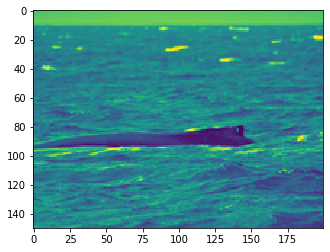

In [14]:
plt.imshow(image_list[7])

In [34]:
# file name for each image
image_names = []
for filename in glob.glob('../../Kaggle_Marine_Life/train_images/*.jpg'):
    name=filename.strip('../../Kaggle_Marine_Life/train_images\\')
    image_names.append(f"{name}g")

In [35]:
len(image_list), len(image_names)

(51033, 51033)

In [36]:
image_names[7]

'000bef247c7a42.jpg'

In [37]:
Image_DF=pd.DataFrame({
    'image': image_list,
    'file_name': image_names
    })

In [38]:
Image_DF.head(3)

,image,file_name
0,"[[0.592156862745098, 0.5764705882352941, 0.560...",00021adfb725ed.jpg
1,"[[0.7568627450980392, 0.7647058823529411, 0.74...",000562241d384d.jpg
2,"[[0.7490196078431373, 0.7568627450980392, 0.74...",0007c33415ce37.jpg


In [50]:
## Join Dataframes

Big_DF=Image_DF.merge(Labels_DF, how='inner')

41362

In [53]:
#Big_DF=Big_DF[:152]
Big_DF.tail(5)

,image,file_name,species,individual_id,category,species_category
41357,"[[0.5294117647058824, 0.5215686274509804, 0.50...",dff96a89c85815.jpg,pantropic_spotted_dolphin,193496745768,0,18
41358,"[[0.3333333333333333, 0.32941176470588235, 0.3...",dffbd2340fb99a.jpg,killer_whale,ea1158a38699,1,14
41359,"[[0.9019607843137255, 0.9019607843137255, 0.90...",dffcfafe735907.jpg,bottlenose_dolphin,cc0e0b020a90,0,2
41360,"[[0.5568627450980392, 0.5490196078431373, 0.55...",dffe20bc14fe42.jpg,fin_whale,180c0ab04dcd,1,9
41361,"[[0.21568627450980393, 0.23137254901960785, 0....",dfff6ac007bd30.jpg,dusky_dolphin,c0cf89810e76,0,7


In [54]:
Big_DF['species'].isna().sum()

0

In [57]:
## Save Dataframe
Big_DF.to_pickle("Clean_DF.pkl")

MemoryError: 

In [55]:
mismatched_images=len(Big_DF)-51033
mismatched_images

-9671

## 9,671 images do not match up with their labeled image name

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=80)
Labels_DF['species'].hist(edgecolor='black', bins=28)

### Create train/val Dataset

In [ ]:
from sklearn.model_selection import train_test_split

y=Big_DF['category']
X=Big_DF['image']

### One Hot Encode Labels

In [ ]:
# One hot encode labels

from keras.utils import to_categorical

y_hot=to_categorical(y)

y_hot[:6]

### Turn list of X into array of arrays

In [ ]:
X_array=np.array(image_list)

### Reshape array

In [ ]:
X_array=X_array.reshape(-1, 150, 200, 1)
X_array.shape

### save prepared data

In [ ]:
np.save('Sample_X_array', X_array)

In [ ]:
np.save('Sample_Y_array', y_hot)

### Training and Validation sets

In [ ]:
X_train, X_val, y_train, y_val= train_test_split(X_array,y_hot, train_size=.80, stratify=y)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
from tensorflow.keras import layers
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(150,200,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(30000, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_array, y_train,batch_size=30, epochs=5)

## Separate Dolphins into species of Dolphin

In [ ]:
Dolphins_Species=pd.DataFrame(Labels_DF.loc[Labels_DF['sub_cat']==1])

In [ ]:
Dolphins_Species['species_category'].value_counts()

#### Consider combining categories with low counts for better training when trying to identify individuals

In [ ]:
len(Labels_DF['individual_id'].unique())

####  15,587 unique individuals in entire data set (dolphins and whales) 51,000 images.  Cannot make individual id files.
####  Species category 10 has 13 unique individuals out of 14 instances.